In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
file_path = '/content/weather_data.csv'  # Update with your dataset path
df = pd.read_csv(file_path)
df.loc[df['Date_Time'].str.startswith("2024-0"), 'Date_Time'] = '2024-01-01 00:00:00'
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [3]:
# Function to visualize temperature trends
def plot_temperature_trends():
    plt.figure(figsize=(12, 6))
    for location in df['Location'].unique():
        location_data = df[df['Location'] == location]
        plt.plot(location_data.index, location_data['Temperature_C'], label=location)
    plt.title('Temperature Trends Over Time')
    plt.xlabel('Date Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid()
    plt.show()


In [4]:
# Function to create bar chart for average temperature by location
def plot_avg_temp_by_location():
    avg_temp = df.groupby('Location')['Temperature_C'].mean()
    avg_temp.sort_values().plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title('Average Temperature by Location')
    plt.ylabel('Temperature (°C)')
    plt.grid(axis='y')
    plt.show()

In [5]:
# Function to create scatter plot of temperature vs. humidity
def scatter_temp_humidity():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Humidity_pct', y='Temperature_C', hue='Location')
    plt.title('Temperature vs. Humidity')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Temperature (°C)')
    plt.legend(title='Location')
    plt.grid()
    plt.show()


In [6]:
# Function to identify and visualize anomalies in temperature
def identify_anomalies():
    threshold = df['Temperature_C'].quantile(0.99)  # Extreme temperatures (top 1%)
    anomalies = df[df['Temperature_C'] > threshold]
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Temperature_C'], label='Temperature')
    plt.scatter(anomalies.index, anomalies['Temperature_C'], color='red', label='Anomalies')
    plt.title('Temperature Anomalies')
    plt.xlabel('Date Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid()
    plt.show()
    print("Anomalies detected:")
    print(anomalies)


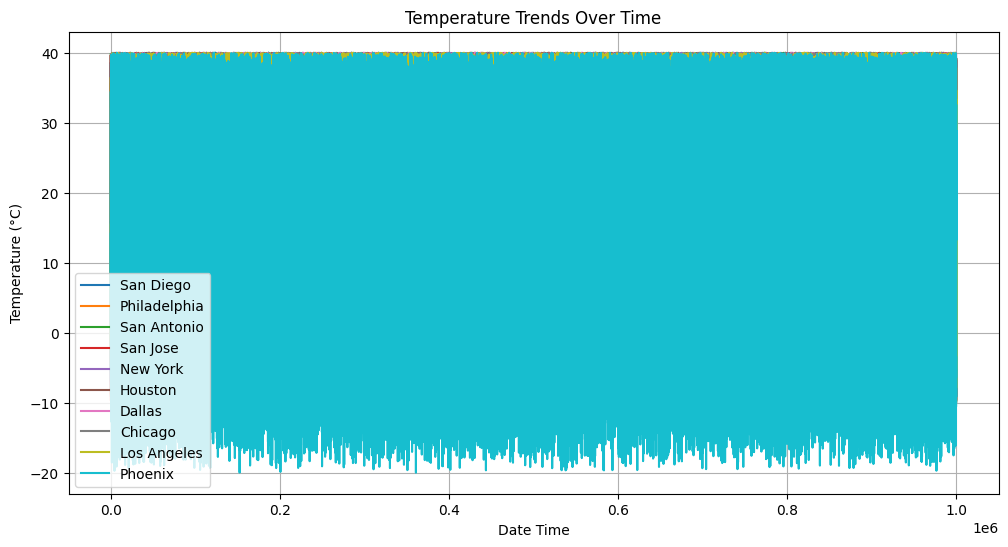

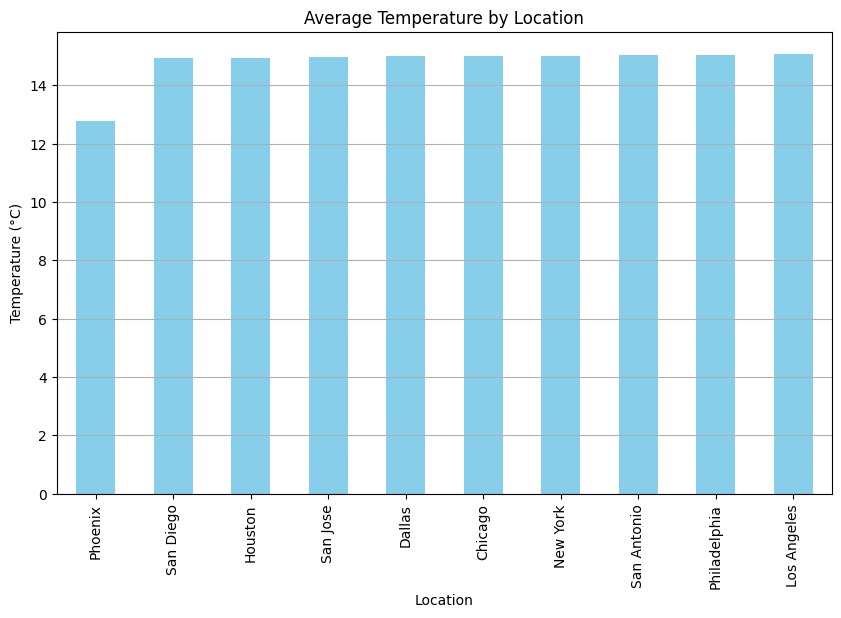

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


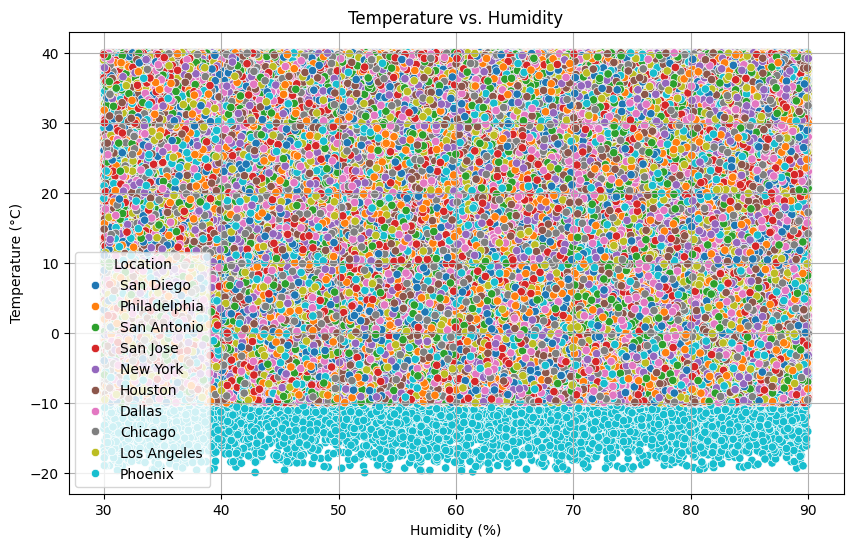

In [ ]:
# Call the functions to visualize the data
plot_temperature_trends()
plot_avg_temp_by_location()
scatter_temp_humidity()
identify_anomalies()